In [1]:
import os
pt=os.getcwd()
pt

'/home/skbae/Desktop/146/cancer_conquerance/BEHRT/BEHRT/preprocess'

I. BERTopic over 40 over 6 years all data ( from 2002 to 2021)
II. BEHRT
 -  MLM : 50%
 - ndp : AFF, Gastric cancer

In [15]:
#pip install pandas

In [2]:
## Import Data

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import os
import json

# Specify the directory containing the JSON files #/home/skbae/cancer_conquerance/Work/Mar2023/test_data/T20.pkl
#json_dir = pt + "/Prevalence/"
csv_dir = '/home/skbae/Desktop/146/cancer_conquerance/Work/Mar2023/test_data/' #Work/Mar2023/test_data' /Prevalence/

In [4]:
csv_dir

'/home/skbae/Desktop/146/cancer_conquerance/Work/Mar2023/test_data/'

In [5]:
import pandas as pd
import glob

# Get a list of all CSV files in the directory
#csv_files = glob.glob('*.csv')
#glob.glob('*.csv')
# Initialize an empty list to hold the DataFrames
#dfs = []

for filename in os.listdir(csv_dir):
    if filename.endswith('.csv'):
        print(filename)

DS.csv
BFC.csv
T20.csv


In [ ]:
#########################################################################################
#########################################################################################
###################################
#PART I . Original Data Import

#########################################################################################
#########################################################################################

In [3]:
## Import Data

import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [10]:
Dis_codeF  = pd.read_csv(csv_dir + "DS.csv")

#1. SICK codes
# Convert the DataFrame to a pickle file
with open('DS.pkl', 'wb') as f:
    pickle.dump(Dis_codeF, f)


T20 = pd.read_csv(csv_dir + "T20.csv")
# Convert the DataFrame to a pickle file
with open('T20.pkl', 'wb') as f:
    pickle.dump(T20, f)


BFC = pd.read_csv(csv_dir + "BFC.csv")
# Convert the DataFrame to a pickle file
#with open('data_pop.pkl', 'wb') as f:
#    pickle.dump(pop, f)

with open('BFC.pkl', 'wb') as f:
    pickle.dump(BFC, f)

In [ ]:
################
### 1. New data : T20.pkl, DS.pkl, BFC.pkl

In [6]:
import pandas as pd
import pickle

# Load the pickle file into a variable
# with open(csv_dir +"DS.pkl", 'rb') as f:
with open('./DS.pkl', 'rb') as f:
    data = pickle.load(f)
# Convert the data to a Pandas DataFrame
DS = pd.DataFrame(data)



#T20
# with open(csv_dir +"T20.pkl", 'rb') as f:
with open('./T20.pkl', 'rb') as f:
    data = pickle.load(f)
T20 = pd.DataFrame(data)


#pop : data_pop.pkl
with open('./BFC.pkl', 'rb') as f: #/home/skbae/cancer_conquerance/BFC.pkl
    data = pickle.load(f)
BFC = pd.DataFrame(data)

In [7]:
DS.head()

,d,dname,wash_out
0,101,Esophageal cancer,5
1,102,Stomach cancer,5
2,103,Liver cancer,5
3,104,Larynx cancer,5
4,105,"Trachea, bronchus and lung cancers",5


In [8]:
# gender dist

BFC_gender=BFC [['ID','SEX']].groupby(['SEX'], as_index=False).agg({"ID":"nunique"})
BFC_gender =pd.DataFrame(BFC_gender).reset_index()
BFC_gender['pct']=BFC_gender['ID'] /len(BFC)
BFC_gender

,index,SEX,ID,pct
0,0,1,323597,0.480244
1,1,2,350221,0.519756


In [9]:
# Age dist
bins= [0,20,30,40,50,60,70,80,90,110]
labels = ['below 20','20s','30s','40s','50s','60s','70s','80s','90s+']
BFC['AgeGroup'] = pd.cut(BFC['AGE'], bins=bins, labels=labels, right=False)
BFC.head()

,ID,SEX,AGE,GAIBJA,AgeGroup
0,1,2,51,2,50s
1,2,2,19,6,below 20
2,3,2,71,7,70s
3,4,1,51,1,50s
4,5,2,49,5,40s


In [10]:
# aggrgating data
age_p = BFC.groupby('AgeGroup')['ID'].count()
#age_p

Text(0, 0.5, 'Counter of Patients')

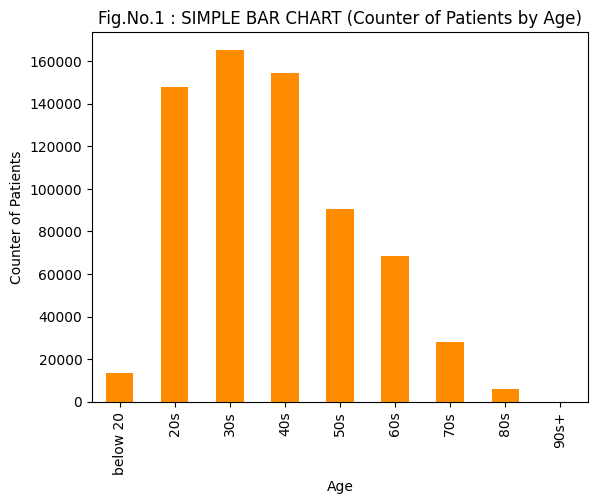

In [11]:
plt.figure(); 
age_p.plot.bar(title='Fig.No.1 : SIMPLE BAR CHART (Counter of Patients by Age)', color='darkorange'); 
plt.xlabel('Age'); plt.ylabel('Counter of Patients') 

In [ ]:
# merge disease and age,gender

In [12]:
T20_BFC=pd.merge(T20 , BFC, how='left', on='ID')

In [13]:
# age over 40
T20_BFC_over40=T20_BFC.loc[T20_BFC['AGE'] > 39]
print(len(T20_BFC_over40))
T20_BFC_over40.head(2)

3821172


,YEAR,ID,d,SEX,AGE,GAIBJA,AgeGroup
0,2006,1,219,2,51,2,50s
1,2007,1,219,2,51,2,50s


In [14]:
# age per year
# 1. all age
T20_BFC['AGE2'] = T20_BFC['YEAR'].astype('int64')-2002 +T20_BFC['AGE'].astype('int64')

#2. over 40
T20_BFC_over40['AGE2'] = T20_BFC_over40['YEAR'].astype('int64')-2002 +T20_BFC_over40['AGE'].astype('int64')

/tmp/ipykernel_197826/790051965.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T20_BFC_over40['AGE2'] = T20_BFC_over40['YEAR'].astype('int64')-2002 +T20_BFC_over40['AGE'].astype('int64')


In [15]:
T20_BFC.head()

,YEAR,ID,d,SEX,AGE,GAIBJA,AgeGroup,AGE2
0,2006,1,219,2,51,2,50s,55
1,2007,1,219,2,51,2,50s,56
2,2009,1,221,2,51,2,50s,58
3,2010,1,219,2,51,2,50s,59
4,2011,1,221,2,51,2,50s,60


In [16]:
T20_BFC_over40.head()

,YEAR,ID,d,SEX,AGE,GAIBJA,AgeGroup,AGE2
0,2006,1,219,2,51,2,50s,55
1,2007,1,219,2,51,2,50s,56
2,2009,1,221,2,51,2,50s,58
3,2010,1,219,2,51,2,50s,59
4,2011,1,221,2,51,2,50s,60


In [ ]:
#########################################################################################
#########################################################################################
###################################
#PART II . Vocaburary and path
#########################################################################################
#########################################################################################

In [32]:
data=T20_BFC
year_cnt=data[['d','ID','YEAR','AGE']].groupby(['YEAR','ID','AGE'], as_index=False).agg({"d":"nunique"})
year_cnt=pd.DataFrame(year_cnt).reset_index()
print(year_cnt.head())

# pivot 
year_cnt2=year_cnt.pivot(index="ID", columns=["YEAR"],values=["d","AGE"]) #values="SICK"
year_cnt2=pd.DataFrame(year_cnt2).reset_index()
year_cnt2=year_cnt2.apply(lambda x: x.fillna(0), axis=0)
year_cnt2=pd.DataFrame(year_cnt2).reset_index()
print(year_cnt2.head())
C= max(year_cnt.d)

   index  YEAR  ID  AGE  d
0      0  2002   4   51  1
1      1  2002  11   28  1
2      2  2002  14   65  1
3      3  2002  15   55  1
4      4  2002  25   35  1
     index ID    d                                     ...   AGE              \
YEAR          2002 2003 2004 2005 2006 2007 2008 2009  ...  2010  2011  2012   
0        0  1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  ...  51.0  51.0  51.0   
1        1  3  0.0  0.0  0.0  0.0  1.0  2.0  0.0  2.0  ...  71.0  71.0  71.0   
2        2  4  1.0  1.0  1.0  2.0  1.0  1.0  1.0  1.0  ...  51.0  51.0  51.0   
3        3  5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   
4        4  6  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   0.0   

                                                
YEAR  2013  2014  2015  2016  2017  2018  2019  
0     51.0   0.0  51.0  51.0  51.0  51.0  51.0  
1     71.0  71.0  71.0  71.0  71.0  71.0  71.0  
2     51.0  51.0  51.0  51.0  51.0  51.0  51.0  
3      0.0   0.0   0.0  49.0   0

In [11]:
max_len = C # 12 # 25 
#max_len = max(a,b) # a = a=max(sc_year_cnt.SICK),46,  b=max(nsc_year_cnt.SICK), 73



# 최대 길이에 맞춰 0 패딩
def padding(x):
    pad = np.zeros(max_len-len(x))
    x.extend(pad)
    return x

In [12]:
import numpy as np

def voc(data):
    #####################
    ####input data 
    #data=prev3_icd_age

    data_cnt = (data.groupby(['YEAR','ID'])).agg({'d': lambda x: x.tolist()})
    data_cnt=pd.DataFrame(data_cnt).reset_index()


    # 1. padding for each year 
    #data_cnt['SICK'] = data_cnt['SICK'].map(lambda x: x[:max_len] if len(x) > max_len else padding(x))

    # 2. without padding
    data_cnt['d2'] = data_cnt['d']

    # 모든 itemid를 순서대로 0 ~ len(unique_codes) key로, value는 실제 codes.
    # vocab index가 1부터 시작
    # 보통의 경우 index = 0 부터 시작을 하니까 vocab size가 589 
    sample = data_cnt

    #codes_unique1 = [item for items in sample['SICK'] for item in items]
    codes_unique2 = [item for items in sample['d2'] for item in items]
    #codes_unique = [item for items in df_last['ITEMID'] for item in items]
    #vocab1 = dict(zip(set(codes_unique1), range(1,len(set(codes_unique1))+1))) # 0 for pad
    vocab2=dict(zip(set(codes_unique2), range(1,len(set(codes_unique2))+1))) # 0 for pad
    #print("vocab", vocab1)
    #print('vocab1 size is .. ', len(vocab1))
    print('vocab2 without padding 0 size is .. ', len(vocab2))
    return vocab2

In [ ]:
vocab2=voc(T20_BFC)

In [ ]:
print('vocab2 size is .. ', len(vocab2))

In [ ]:
import numpy as np
data= T20_BFC#T20_BFC_over40 #prev3_icd_age


data_cnt = (data.groupby(['YEAR','ID'])).agg({'d': lambda x: x.tolist()})
data_cnt=pd.DataFrame(data_cnt).reset_index()


# padding for each year 
data_cnt['d'] = data_cnt['d'].map(lambda x: x[:max_len] if len(x) > max_len else padding(x))
data_cnt['d2'] = data_cnt['d']

# 모든 itemid를 순서대로 0 ~ len(unique_codes) key로, value는 실제 codes.
# vocab index가 1부터 시작
# 보통의 경우 index = 0 부터 시작을 하니까 vocab size가 589 
sample = data_cnt

codes_unique1 = [item for items in sample['d'] for item in items]
#codes_unique2 = [item for items in sample['SICK2'] for item in items]
#codes_unique = [item for items in df_last['ITEMID'] for item in items]
vocab1 = dict(zip(set(codes_unique1), range(1,len(set(codes_unique1))+1))) # 0 for pad
#vocab2=dict(zip(set(codes_unique2), range(1,len(set(codes_unique2))+1))) # 0 for pad
#print("vocab", vocab1)
print('vocab1 size is .. ', len(vocab1))

In [ ]:
print('vocab1 size is .. ', len(vocab1))

In [ ]:
import pickle

#pet_stats = {'name':"", 'int':1, 'bool':False}
#vocab1

with open('vocab1_new.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(vocab1, f, pickle.HIGHEST_PROTOCOL)


import pickle

#pet_stats = {'name':"", 'int':1, 'bool':False}
#vocab1

with open('vocab2_new.pickle', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(vocab2, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# Import Dictionary

In [17]:
import pickle  # /home/skbae/cancer_conquerance/vocab1_new.pickle

with open('../../../vocab2_new.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    vocab2 = pickle.load(f)


import pickle

with open('../../../vocab1_new.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    vocab1 = pickle.load(f)

In [ ]:
#########################################################################################
#########################################################################################
###################################
#PART III . MLM data preprocessing : data formatting before embedding
#########################################################################################
#########################################################################################

In [ ]:
# T20_BFC

In [33]:
T20_BFC[['YEAR','ID','d','AGE2']].tail(15)

,YEAR,ID,d,AGE2
4984041,2012,673814,134,83
4984042,2012,673814,139,83
4984043,2012,673815,147,34
4984044,2006,673816,136,41
4984045,2007,673816,136,42
4984046,2008,673816,136,43
4984047,2009,673816,136,44
4984048,2010,673816,136,45
4984049,2011,673816,136,46
4984050,2012,673816,136,47


In [ ]:
# T20_BFC_over40

In [18]:
len(T20_BFC_over40)

3821172

In [ ]:
# from common.spark import spark_init, read_parquet, read_txt
# from CPRD.tabel import EHR
# import pyspark.sql.functions as F
# from pyspark.sql import Window

# spark = spark_init()

# config= {
#     'diagnoses': '',  # data path for diagnoses/medication
#     'demographic': '',  # data path for demographic information
#     'output': '',  # path to save formated file
#     'col_name': ''  # column name for ICD/Med code
# }

# diagnoses = read_parquet(spark.sqlContext, config['diagnoses']).select(['patid','eventdate',config['col_name']]).na.drop().select(['patid','eventdate', config['col_name']])
# demographic = read_parquet(spark.sqlContext, config['demographic'])

# diagnoses = diagnoses.na.drop()
# diagnoses = diagnoses.dropDuplicates()

# # demographic data
# demographic = demographic.select(['patid', 'yob'])
# diagnoses= diagnoses.join(demographic, diagnoses.patid == demographic.patid, 'inner').drop(demographic.patid)
# diagnoses = EHR(diagnoses).cal_age('eventdate', 'yob', year=False).select(['patid', 'eventdate', 'age', config['col_name'], 'yob'])
# diagnoses = diagnoses.dropDuplicates()

# # set age and code to string
# diagnoses = EHR(diagnoses).set_col_to_str('age').set_col_to_str(config['col_name'])
# # group by date
# diagnoses = diagnoses.groupby(['patid', 'eventdate']).agg(F.collect_list(config['col_name']).alias(config['col_name']), F.collect_list('age').alias('age'), F.first('yob').alias('yob'))
# diagnoses = EHR(diagnoses).array_add_element(config['col_name'], 'SEP')

# # add extra age to fill the gap of sep
# extract_age = F.udf(lambda x: x[0])
# diagnoses = diagnoses.withColumn('age_temp', extract_age('age')).withColumn('age', F.concat(F.col('age'),F.array(F.col('age_temp')))).drop('age_temp')

# w = Window.partitionBy('patid').orderBy('eventdate')
# # sort and merge ccs and age
# diagnoses = diagnoses.withColumn(config['col_name'], F.collect_list(config['col_name']).over(w)).withColumn('age', F.collect_list('age').over(w)).groupBy('patid').agg(F.max(config['col_name']).alias(config['col_name']), F.max('age').alias('age'))

# diagnoses = EHR(diagnoses).array_flatten(config['col_name']).array_flatten('age')
# diagnoses.write.parquet(config['output'])

In [ ]:
## windowing T20_BFC['AGE2']

In [132]:
T20_BFC.head()

,YEAR,ID,d,SEX,AGE,GAIBJA,AGE2
0,2006,1,219,2,51,2,55
1,2007,1,219,2,51,2,56
2,2009,1,221,2,51,2,58
3,2010,1,219,2,51,2,59
4,2011,1,221,2,51,2,60


In [16]:
T20_BFC_over40.head()

,YEAR,ID,d,SEX,AGE,GAIBJA,AGE2
0,2006,1,219,2,51,2,55
1,2007,1,219,2,51,2,56
2,2009,1,221,2,51,2,58
3,2010,1,219,2,51,2,59
4,2011,1,221,2,51,2,60


In [ ]:
# 1. for all T20 : 'T20_BFC'
# 2. only for over 40 : T20_BFC_over40

In [15]:
import pandas as pd

In [16]:
def pre(data) :
# Assuming the DataFrame is already created and named  : data 

# Set age and code to string
    data['AGE2'] = data['AGE2'].astype(str)
    data['d'] = data['d'].astype(str)

# Group by 'ID' and aggregate 'd' and 'AGE2' using lists
    grouped_diagnoses2 = data.groupby(['ID','YEAR'])[['d', 'AGE2']].agg(list).reset_index()

# Add 'SEP' to 'd' lists
    grouped_diagnoses2['d2'] = grouped_diagnoses2['d'].apply(lambda x: x + ['SEP'])

    # Add 'SEP' to 'd' lists
    grouped_diagnoses2['d2'] = grouped_diagnoses2['d'].apply(lambda x: x + ['SEP'])
    grouped_diagnoses2['AGE3']=grouped_diagnoses2['AGE2'].apply(lambda x: x+[x[0]])
    grouped =grouped_diagnoses2[['ID','AGE3','d2']].groupby('ID').apply(lambda x: pd.Series({'d2': x['d2'].sum(), 'AGE': x['AGE3'].sum()})).reset_index()

    # Remove the last 'SEP' value from each row in the 'd2' column
    df = grouped
    df['d2'] = df['d2'].apply(lambda row: row[:-1] if row[-1] == 'SEP' else row)
    df['AGE2'] = df['AGE'].apply(lambda row: row[:-1])  
    df_f=pd.merge(df, BFC, how='left', on='ID')
    return  df_f

In [19]:
#T20_BFC_df_f= pre(T20_BFC)

T20_BFC_over40_df_f= pre(T20_BFC_over40)

/tmp/ipykernel_18788/2898568637.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AGE2'] = data['AGE2'].astype(str)
/tmp/ipykernel_18788/2898568637.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['d'] = data['d'].astype(str)


In [133]:
# T20_BFC
T20_BFC_df_f= pre(T20_BFC)

In [ ]:
# import pandas as pd

# # Assuming the DataFrame is already created and named 'T20_BFC_over40'

# # Set age and code to string
# T20_BFC_over40['AGE2'] = T20_BFC_over40['AGE2'].astype(str)
# T20_BFC_over40['d'] = T20_BFC_over40['d'].astype(str)

# # Group by 'ID' and aggregate 'd' and 'AGE2' using lists
# grouped_diagnoses2 = T20_BFC_over40.groupby(['ID','YEAR'])[['d', 'AGE2']].agg(list).reset_index()

# # Add 'SEP' to 'd' lists
# grouped_diagnoses2['d2'] = grouped_diagnoses2['d'].apply(lambda x: x + ['SEP'])

# # Add 'SEP' to 'd' lists
# grouped_diagnoses2['d2'] = grouped_diagnoses2['d'].apply(lambda x: x + ['SEP'])
# grouped_diagnoses2['AGE3']=grouped_diagnoses2['AGE2'].apply(lambda x: x+[x[0]])
# grouped =grouped_diagnoses2[['ID','AGE3','d2']].groupby('ID').apply(lambda x: pd.Series({'d2': x['d2'].sum(), 'AGE': x['AGE3'].sum()})).reset_index()

# # Remove the last 'SEP' value from each row in the 'd2' column
# df = grouped
# df['d2'] = df['d2'].apply(lambda row: row[:-1] if row[-1] == 'SEP' else row)
# df['AGE2'] = df['AGE'].apply(lambda row: row[:-1])

# df_f=pd.merge(df, BFC, how='left', on='ID')

In [30]:
df_f.head()

,ID,d2,AGE_x,AGE2,SEX,AGE_y,GAIBJA
0,1,"[219, SEP, 219, SEP, 221, SEP, 219, SEP, 221, ...","[55, 55, 56, 56, 58, 58, 59, 59, 60, 60, 61, 6...","[55, 55, 56, 56, 58, 58, 59, 59, 60, 60, 61, 6...",2,51,2
1,3,"[219, SEP, 147, 219, SEP, 147, 219, SEP, 147, ...","[75, 75, 76, 76, 76, 78, 78, 78, 79, 79, 79, 8...","[75, 75, 76, 76, 76, 78, 78, 78, 79, 79, 79, 8...",2,71,7
2,4,"[151, SEP, 151, SEP, 151, SEP, 151, 220, SEP, ...","[51, 51, 52, 52, 53, 53, 54, 54, 54, 55, 55, 5...","[51, 51, 52, 52, 53, 53, 54, 54, 54, 55, 55, 5...",1,51,1
3,5,"[220, 238, 239, SEP, 219, SEP, 220]","[63, 63, 63, 63, 65, 65, 66, 66]","[63, 63, 63, 63, 65, 65, 66]",2,49,5
4,8,"[220, SEP, 169, SEP, 169, SEP, 134, SEP, 134]","[76, 76, 77, 77, 78, 78, 80, 80, 81, 81]","[76, 76, 77, 77, 78, 78, 80, 80, 81]",2,70,1


In [ ]:
#  'T20_BFC'

In [ ]:
# import pandas as pd

# # Assuming the DataFrame is already created and named 'T20_BFC'

# # Set age and code to string
# T20_BFC['AGE2'] = T20_BFC['AGE2'].astype(str)
# T20_BFC['d'] = T20_BFC['d'].astype(str)

# # Group by 'ID' and aggregate 'd' and 'AGE2' using lists
# grouped_diagnoses2 = T20_BFC.groupby(['ID','YEAR'])[['d', 'AGE2']].agg(list).reset_index()

# # Add 'SEP' to 'd' lists
# grouped_diagnoses2['d2'] = grouped_diagnoses2['d'].apply(lambda x: x + ['SEP'])

# # # Add 'SEP' to 'd' lists
# # grouped_diagnoses2['d2'] = grouped_diagnoses2['d'].apply(lambda x: x + ['SEP'])
# # grouped_diagnoses2['AGE3']=grouped_diagnoses2['AGE2'].apply(lambda x: x+[x[0]])
# # grouped =grouped_diagnoses2[['ID','AGE3','d2']].groupby('ID').apply(lambda x: pd.Series({'d2': x['d2'].sum(), 'AGE': x['AGE3'].sum()})).reset_index()


# # # Remove the last 'SEP' value from each row in the 'd2' column
# # df = grouped
# # df['d2'] = df['d2'].apply(lambda row: row[:-1] if row[-1] == 'SEP' else row)
# # df['AGE2'] = df['AGE'].apply(lambda row: row[:-1])

# df_f=pd.merge(df, BFC, how='left', on='ID')




In [ ]:
# Preprocessing for Deep Learning

In [ ]:
# 1. remove the patients having stomach cancer during the time 2 
# 2. X : time 1 and time 2 ( model 1 and 2)
# 3. Y : whehter it has stomach cancer during time 3 ( model3)

In [33]:
T20_BFC_over40_df_f.head()

,ID,d2,AGE_x,AGE2,SEX,AGE_y,GAIBJA
0,1,"[219, SEP, 219, SEP, 221, SEP, 219, SEP, 221, ...","[55, 55, 56, 56, 58, 58, 59, 59, 60, 60, 61, 6...","[55, 55, 56, 56, 58, 58, 59, 59, 60, 60, 61, 6...",2,51,2
1,3,"[219, SEP, 147, 219, SEP, 147, 219, SEP, 147, ...","[75, 75, 76, 76, 76, 78, 78, 78, 79, 79, 79, 8...","[75, 75, 76, 76, 76, 78, 78, 78, 79, 79, 79, 8...",2,71,7
2,4,"[151, SEP, 151, SEP, 151, SEP, 151, 220, SEP, ...","[51, 51, 52, 52, 53, 53, 54, 54, 54, 55, 55, 5...","[51, 51, 52, 52, 53, 53, 54, 54, 54, 55, 55, 5...",1,51,1
3,5,"[220, 238, 239, SEP, 219, SEP, 220]","[63, 63, 63, 63, 65, 65, 66, 66]","[63, 63, 63, 63, 65, 65, 66]",2,49,5
4,8,"[220, SEP, 169, SEP, 169, SEP, 134, SEP, 134]","[76, 76, 77, 77, 78, 78, 80, 80, 81, 81]","[76, 76, 77, 77, 78, 78, 80, 80, 81]",2,70,1


In [233]:
#Export
import pickle

with open('T20_BFC_BEHRT_grouped_df.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(df, f)

# with open('T20_out_group_data_sickF_no_scancer_op1.pkl', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(group_data_sickF_no_scancer, f)

In [20]:
#T20_BFC_over40_df_f

#Export
import pickle

with open('./T20_BFC_over40_df_f.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(T20_BFC_over40_df_f, f)


In [ ]:
print(len(T20_BFC_df_f))
T20_BFC_df_f.head()

In [ ]:
#T20_BFC_df_f

#Export
import pickle

with open('./T20_BFC_df_f.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(T20_BFC_df_f, f)

In [24]:
#I.Import : /home/skbae/cancer_conquerance/T20_BFC_BEHRT_grouped_df.pkl
# /home/skbae/Desktop/146/cancer_conquerance/BEHRT/BEHRT/preprocess/T20_BFC_BEHRT_grouped_df.pkl
import pickle

with open('/home/skbae/Desktop/146/cancer_conquerance/BEHRT/BEHRT/preprocess/T20_BFC_BEHRT_grouped_df.pkl', 'rb') as f:
    data = pickle.load(f)
    group_data_sickFinal_F2 = pd.DataFrame(data)

In [ ]:
#Export
import pickle

with open('T20_BFC_over40_df_f.pkl', 'rb') as f:
    data = pickle.load(f)
    # Pickle the 'data' dictionary using the highest protocol available.
    T20_BFC_over40=pickle.dump(T20_BFC_over40_df_f, f)


In [ ]:
##3 data over 40

In [27]:
# #import

# #I.Import : /home/skbae/Desktop/146/cancer_conquerance/BEHRT/BEHRT/preprocess/T20_BFC_over40_df_f.pkl
import pickle

with open('/home/skbae/Desktop/146/cancer_conquerance/BEHRT/BEHRT/preprocess/T20_BFC_over40_df_f.pkl', 'rb') as f:
    data2 = pickle.load(f)
    T20_BFC_over40_df_f = pd.DataFrame(data2)

In [28]:
print(len (group_data_sickFinal_F2)) # by id all ag3
print(len (T20_BFC_over40_df_f )) # by id over 40
len(T20_BFC_over40)

600030
331811


3821172

In [26]:
group_data_sickFinal_F2.head()

,ID,d2,AGE,AGE2
0,1,"[219, SEP, 219, SEP, 221, SEP, 219, SEP, 221, ...","[55, 55, 56, 56, 58, 58, 59, 59, 60, 60, 61, 6...","[55, 55, 56, 56, 58, 58, 59, 59, 60, 60, 61, 6..."
1,3,"[219, SEP, 147, 219, SEP, 147, 219, SEP, 147, ...","[75, 75, 76, 76, 76, 78, 78, 78, 79, 79, 79, 8...","[75, 75, 76, 76, 76, 78, 78, 78, 79, 79, 79, 8..."
2,4,"[151, SEP, 151, SEP, 151, SEP, 151, 220, SEP, ...","[51, 51, 52, 52, 53, 53, 54, 54, 54, 55, 55, 5...","[51, 51, 52, 52, 53, 53, 54, 54, 54, 55, 55, 5..."
3,5,"[220, 238, 239, SEP, 219, SEP, 220]","[63, 63, 63, 63, 65, 65, 66, 66]","[63, 63, 63, 63, 65, 65, 66]"
4,6,[152],"[31, 31]",[31]


In [ ]:
# over 40 all by pTIENT ID : T20_BFC_over40_df_f 

In [29]:
# 1. direct use
group_data_sickFinal_F2=T20_BFC_over40_df_f

In [30]:
# 2. after importing
sample_f= group_data_sickFinal_F2

In [36]:
# Traiin and Test
# sample_f['fold']=0
sample_f['fold2']=0
# print('about 20% of whole data used as Test set. We select index for last( before .) sample_f number is 8 or 9.')
# test_index = (sample_f['ID'].astype(str).map(lambda x : x[-1]) == '8') |(sample_f['ID'].astype(str).map(lambda x : x[-1]) == '9')
print('about 50% of whole data used as NDP set. We select index for last( before .) sample_f number is 6 or 7 or 8 or 9.')
test_index2 = (sample_f['ID'].astype(str).map(lambda x : x[-1]) == '1') |(sample_f['ID'].astype(str).map(lambda x : x[-1]) == '3') |(sample_f['ID'].astype(str).map(lambda x : x[-1]) == '5') |(sample_f['ID'].astype(str).map(lambda x : x[-1]) == '7') |(sample_f['ID'].astype(str).map(lambda x : x[-1]) == '9')

# sample_f.loc[test_index, 'fold'] = 1
sample_f.loc[test_index2, 'fold2'] = 1
# print('Fold 0 -> train set  Fold 1 -> test set')
# print(sample_f['fold'].value_counts())

print('Fold2 1 -> MLM set  Fold2 0 -> NDP set')
print(sample_f['fold2'].value_counts())

about 50% of whole data used as NDP set. We select index for last( before .) sample_f number is 6 or 7 or 8 or 9.
Fold2 1 -> MLM set  Fold2 0 -> NDP set
0    165986
1    165825
Name: fold2, dtype: int64


In [37]:
g_data=sample_f

In [38]:
# MLM (option1)
group_data_sickFinal_mlm1=pd.DataFrame(g_data[g_data['fold2']==0]).reset_index()

In [39]:
# MLM (option2)
group_data_sickFinal_mlm2=pd.DataFrame(g_data[g_data['fold2']==1]).reset_index()

In [40]:
#Export : option1
import pickle

with open('./T20_BFC_BEHRT_group_data_sickFinal_mlm_op1_over40.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(group_data_sickFinal_mlm1, f)

# import pandas as pd
# import pickle 
# # refer to the data preprocessing

# with open('T20_BFC_BEHRT_group_data_sickFinal_mlm.pkl', 'rb') as f:
#     data = pickle.load(f)
# group_data_sickFinal_mlm = pd.DataFrame(data)

In [41]:
#Export : option2
import pickle

with open('./T20_BFC_BEHRT_group_data_sickFinal_mlm_op2_over40.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(group_data_sickFinal_mlm2, f)

In [31]:
# Export for BERtopic 100%over 40
# group_data_sickFinal_F2=T20_BFC_over40_df_f
# 
import pickle

with open('./T20_BFC_BEHRT_group_data_BERTopic_over40_all.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(T20_BFC_over40_df_f, f)

In [42]:
# NDP ( option1)
group_data_sickFinal_NSP1=pd.DataFrame(g_data[g_data['fold2']==1]).reset_index()

In [43]:
# NDP ( option2)
group_data_sickFinal_NSP2=pd.DataFrame(g_data[g_data['fold2']==0]).reset_index()

In [44]:
#Export : option1
import pickle

with open('./T20_BFC_BEHRT_group_data_sickFinal_NSP_op1_over40.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(group_data_sickFinal_NSP1, f)


# import pandas as pd
# import pickle 
# # refer to the data preprocessing

# with open('T20_BFC_BEHRT_group_data_sickFinal_NSP', 'rb') as f:
#     data = pickle.load(f)
# group_data_sickFinal_NSP = pd.DataFrame(data)


In [45]:
#Export : option2
import pickle

with open('./T20_BFC_BEHRT_group_data_sickFinal_NSP_op2_over40.pkl', 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(group_data_sickFinal_NSP2, f)

In [ ]:
########################################################
#########NDP : data preprocessing
#######################################################

In [40]:
# option1
import pandas as pd
import pickle 
# refer to the data preprocessing : over 40 patients

#with open('/home/skbae/cancer_conquerance/BEHRT/BEHRT/task/T20_BFC_BEHRT_group_data_sickFinal_mlm_op1.pkl', 'rb') as f:
with open('./T20_BFC_BEHRT_group_data_sickFinal_NSP_op1_over40.pkl', 'rb') as f:    
    data = pickle.load(f)
    group_data_sickFinal_NSP1= pd.DataFrame(data)

In [ ]:
# option 3 : all over 40 BERTopic

# Export for BERtopic 100%over 40
# group_data_sickFinal_F2=T20_BFC_over40_df_f
# 
import pickle

# with open('./T20_BFC_BEHRT_group_data_BERTopic_over40_all.pkl', 'wb') as f:
#     # Pickle the 'data' dictionary using the highest protocol available.
#     pickle.dump(T20_BFC_over40_df_f, f)

with open('./T20_BFC_BEHRT_group_data_BERTopic_over40_all.pkl', 'rb') as f:    
    data3 = pickle.load(f)
    T20_BFC_over40_df_f= pd.DataFrame(data3)

In [ ]:
# DOI :Disease of Interesting
# 1. Both
# 102 : Stomach cancer

# 2.Male
#161: Pancreatitis
# 138: Atrial fibrillation and flutter

# 3.Female 
# 138: Atrial fibrillation and flutter
# 165: Parkinsons disease


In [41]:
# when use the 1st option 
group_data_sickFinal_NSP=group_data_sickFinal_NSP1

In [45]:
# when use the 2nd option 
group_data_sickFinal_NSP=group_data_sickFinal_NSP2

In [32]:
# when using option 3

group_data_sickFinal_over40 = T20_BFC_over40_df_f